In [1]:
# 필요한 라이브러리 불러오기

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# url 불러오기

url = 'https://www.seoul.go.kr/coronaV/coronaStatus.do'
url

'https://www.seoul.go.kr/coronaV/coronaStatus.do'

In [3]:
#판다스의 read_html 사용해서 url 속에서 내용 불러오기

table = pd.read_html(url)
len(table)

8

In [4]:
# html 태그 불러오기

table[2].transpose() #행과 열 바꿔서 보기

,0
소계,1607
해외접촉관련,343
송파구교회관련,18
강서구요양시설관련,26
강남구사무실관련,29
강남구사무실K빌딩,7
강남구역삼동모임,13
리치웨이관련,122
부천시쿠팡관련,24
관악구사무실관련,14


In [5]:
# 필요한 테이블을 가져온다.

df = table[7]
df.head()

,연번,환자번호,감염경로,확진일,거주지,격리시설
0,"1607 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14364,송파구 확진자 접촉,8/1,양천구,NaN
1,"1606 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14362,종로구 지인모임 신명투자,8/1,종로구,서울의료원
2,"1605 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14360,확인 중,7/31,마포구,서울대학교병원
3,"1604 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14366,강서구 요양시설관련,8/1,강서구,보라매병원
4,"1603 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14365,강서구 요양시설관련,8/1,강서구,삼육서울병원


In [9]:
# 가장 최근 확진일 보기
# 날짜명을 파일제목으로 쓰기 위해 표현 형식 바꿔주기

last_day = df.loc[0, "확진일"]
last_day = last_day.replace('/', '_')
last_day

'8_1'

In [10]:
# 파일명 정하기
# file_name(주피터 내장)을 사용하면, 파일명을 출력해준다.

file_name = f"seoul-covid19_{last_day}.csv"
file_name

'seoul-covid19_8_1.csv'

In [11]:
# csv파일로 저장해주기

df.to_csv(file_name, index = False)

In [12]:
# 파일 불러오기

df = pd.read_csv(file_name)
df.head()

,연번,환자번호,감염경로,확진일,거주지,격리시설
0,"1607 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14364,송파구 확진자 접촉,8/1,양천구,NaN
1,"1606 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14362,종로구 지인모임 신명투자,8/1,종로구,서울의료원
2,"1605 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14360,확인 중,7/31,마포구,서울대학교병원
3,"1604 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14366,강서구 요양시설관련,8/1,강서구,보라매병원
4,"1603 <tr> <td class=""tdl"" colspan=""5""> <p>확...",#14365,강서구 요양시설관련,8/1,강서구,삼육서울병원


In [13]:
# 연번 뒤에 붙은 태그들 떼주기(왜 붙었는지 모름)

for i in range(len(df['연번'])):
    a = str(df['연번'][i])
    df['연번'][i] = a.split()[0]
    
df.head()

,연번,환자번호,감염경로,확진일,거주지,격리시설
0,1607,#14364,송파구 확진자 접촉,8/1,양천구,NaN
1,1606,#14362,종로구 지인모임 신명투자,8/1,종로구,서울의료원
2,1605,#14360,확인 중,7/31,마포구,서울대학교병원
3,1604,#14366,강서구 요양시설관련,8/1,강서구,보라매병원
4,1603,#14365,강서구 요양시설관련,8/1,강서구,삼육서울병원


In [14]:
# 환자번호에서 '#' 떼주기

for i in range(len(df['환자번호'])):
    b = str(df['환자번호'][i])
    df['환자번호'][i] = b[1:]
    
df.head()

,연번,환자번호,감염경로,확진일,거주지,격리시설
0,1607,14364,송파구 확진자 접촉,8/1,양천구,NaN
1,1606,14362,종로구 지인모임 신명투자,8/1,종로구,서울의료원
2,1605,14360,확인 중,7/31,마포구,서울대학교병원
3,1604,14366,강서구 요양시설관련,8/1,강서구,보라매병원
4,1603,14365,강서구 요양시설관련,8/1,강서구,삼육서울병원


In [15]:
# 데이터프레임 정보 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      1607 non-null   object
 1   환자번호    1607 non-null   object
 2   감염경로    1607 non-null   object
 3   확진일     1607 non-null   object
 4   거주지     1607 non-null   object
 5   격리시설    1606 non-null   object
dtypes: object(6)
memory usage: 75.5+ KB


In [16]:
# 원하는 타입으로 바꿔주기 - astype() 이용
# 날짜 타입으로 바꾸는건 - pd.to_datetime() 이용

df['연번'] = df['연번'].astype(int)
df['환자번호'] = df['환자번호'].astype(int)
df['감염경로'] = df['감염경로'].astype(str)
df['확진일'] = pd.to_datetime('2020-' + df['확진일'].str.replace('/', '-'))
df['거주지'] = df['거주지'].astype(str)
df['격리시설'] = df['격리시설'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      1607 non-null   int32         
 1   환자번호    1607 non-null   int32         
 2   감염경로    1607 non-null   object        
 3   확진일     1607 non-null   datetime64[ns]
 4   거주지     1607 non-null   object        
 5   격리시설    1607 non-null   object        
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 62.9+ KB


In [17]:
df.head()

,연번,환자번호,감염경로,확진일,거주지,격리시설
0,1607,14364,송파구 확진자 접촉,2020-08-01,양천구,nan
1,1606,14362,종로구 지인모임 신명투자,2020-08-01,종로구,서울의료원
2,1605,14360,확인 중,2020-07-31,마포구,서울대학교병원
3,1604,14366,강서구 요양시설관련,2020-08-01,강서구,보라매병원
4,1603,14365,강서구 요양시설관련,2020-08-01,강서구,삼육서울병원


In [18]:
# 시각화를 위한 한글폰트 설정

plt.rc('font', family ='Malgun Gothic')

"""
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")
"""

'\nplt.rc("axes", unicode_minus=False)\nplt.style.use("fivethirtyeight")\n'

In [19]:
# 시각화 선명하게 설정하기

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [20]:
# 날짜 파악을 위한 데이터프레임 생성

DATE = df[['연번','확진일']]
DATE

,연번,확진일
0,1607,2020-08-01
1,1606,2020-08-01
2,1605,2020-07-31
3,1604,2020-08-01
4,1603,2020-08-01
...,...,...
1602,5,2020-01-31
1603,4,2020-01-30
1604,3,2020-01-30
1605,2,2020-01-30


In [21]:
# 확진일별 발생 환자수 보기

DATE['확진일'].value_counts()

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
              ..
2020-02-07     1
2020-04-30     1
2020-04-15     1
2020-03-03     1
2020-01-24     1
Name: 확진일, Length: 162, dtype: int64

Text(0, 0.5, '확진자수')

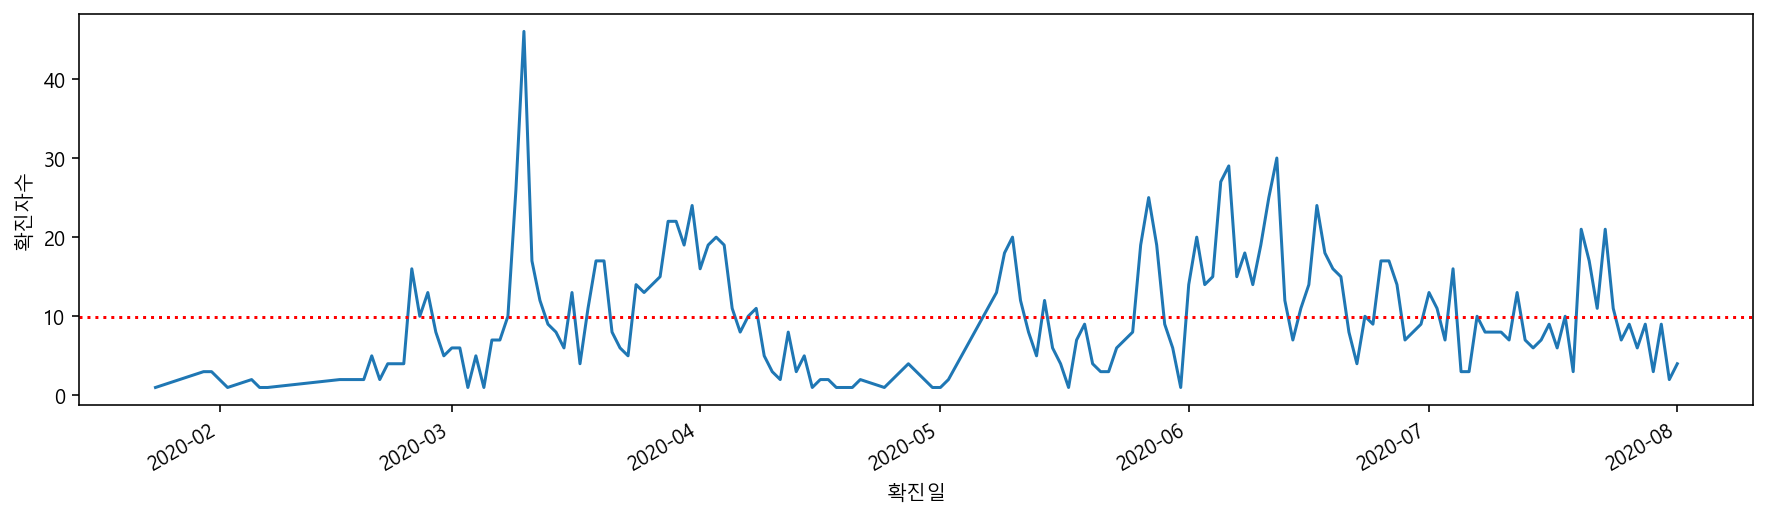

In [22]:
# 확진일별 발생 환자수 그래프 그리기(선그래프)

DATE['확진일'].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(DATE['확진일'].value_counts().mean(), color='red', linestyle = ':') # y = 평균 선 추가
plt.xlabel('확진일')
plt.ylabel('확진자수')

<ipython-input-22-5583c470f644>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATE['월일'] = DATE['확진일'].astype(str).map(lambda x: x[-5:])


Text(0, 0.5, '확진자수')

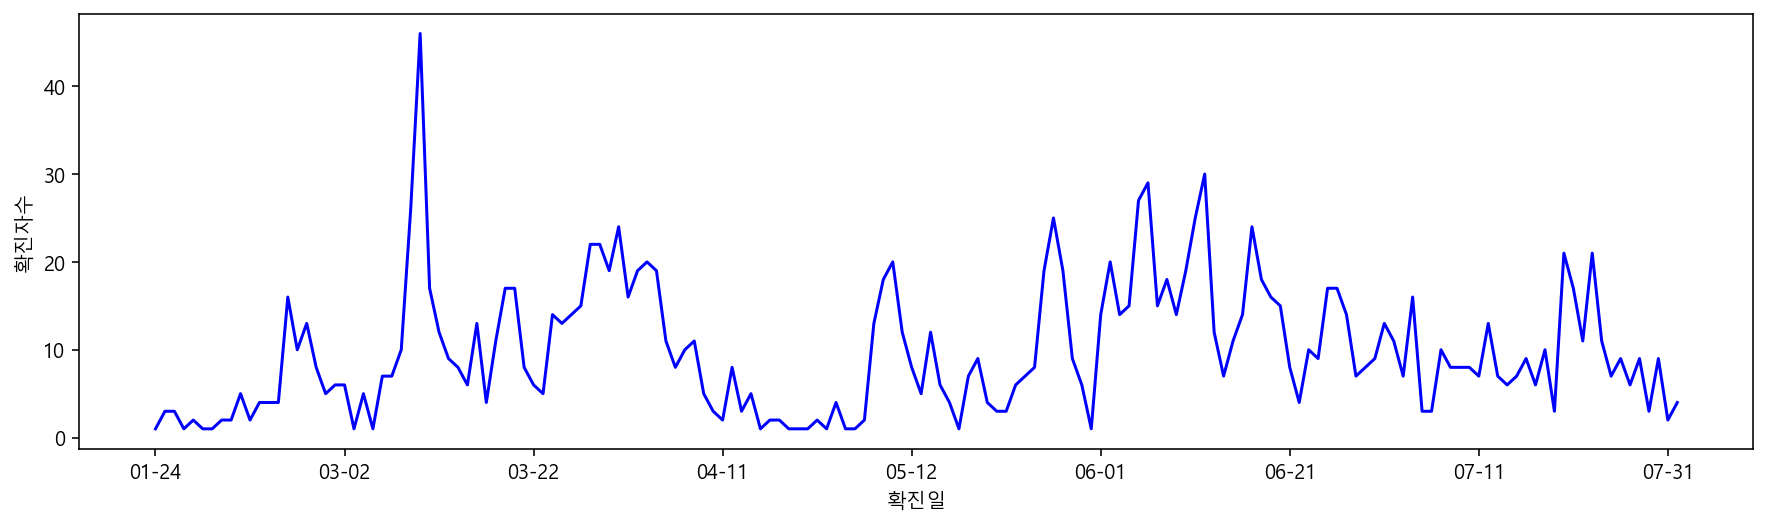

In [22]:
# 연도 생략하고 그래프 그리기 - 익명함수, map() 이용


DATE['월일'] = DATE['확진일'].astype(str).map(lambda x: x[-5:])
DATE['월일']

DATE['월일'].value_counts().sort_index().plot(figsize = (15, 4), cmap = 'winter')
plt.xlabel('확진일')
plt.ylabel('확진자수')

In [23]:
DATE.head()

,연번,확진일,월일
0,1607,2020-08-01,08-01
1,1606,2020-08-01,08-01
2,1605,2020-07-31,07-31
3,1604,2020-08-01,08-01
4,1603,2020-08-01,08-01
